In [23]:
import os

import pandas as pd
import numpy as np
import kaggle
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Task description
This jupyter notebook preprocesses the data prior to modeling.

# Download and import data
We will now download the data directly from Kaggle using the Kaggle API, and then import it into a Pandas dataframe. The data is about asteroids and is provided by NeoWS (Near-Earth Object Web Service).

In [2]:
# download the data from https://www.kaggle.com/shrutimehta/nasa-asteroids-classification using the Kaggle API.
# please adjust the path '/Users/annanau/.local/bin/kaggle' as necessary prior to running
! /Users/annanau/.local/bin/kaggle datasets download -d shrutimehta/nasa-asteroids-classification -p data -q

In [79]:
# unzip downloaded file
cwd = os.getcwd()
dir_data = os.path.join(cwd, 'data')
path_to_zip_file = 'nasa-asteroids-classification.zip'
with zipfile.ZipFile(os.path.join(dir_data, path_to_zip_file), 'r') as file:
    file.extractall(dir_data)

# import train.csv into a pandas dataframe called total_data
df_nasa = pd.read_csv(dir_data + '/nasa.csv')

print(f'df_nasa shape: {df_nasa.shape}')
print('Head of df_nasa:')
display(df_nasa.head(3))

df_nasa shape: (4687, 40)
Head of df_nasa:


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True


# Data pre-processing

### Rename columns

In [80]:
# fix column names: replace each ' ' with '_'. 
df_nasa.columns = df_nasa.columns.str.strip().str.lower().str.replace(' ', '_', regex=False).str.replace('(', '_', regex=False).str.replace(')', '', regex=False)

print('Head of df_nasa:')
display(df_nasa.head(3))

Head of df_nasa:


,neo_reference_id,name,absolute_magnitude,est_dia_in_km_min,est_dia_in_km_max,est_dia_in_m_min,est_dia_in_m_max,est_dia_in_miles_min,est_dia_in_miles_max,est_dia_in_feet_min,est_dia_in_feet_max,close_approach_date,epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist._astronomical,miss_dist._lunar,miss_dist._kilometers,miss_dist._miles,orbiting_body,orbit_id,orbit_determination_date,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,equinox,hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True


### Check missing values

In [81]:
# missing values analysis
df_nasa.isnull().sum()

neo_reference_id                0
name                            0
absolute_magnitude              0
est_dia_in_km_min               0
est_dia_in_km_max               0
est_dia_in_m_min                0
est_dia_in_m_max                0
est_dia_in_miles_min            0
est_dia_in_miles_max            0
est_dia_in_feet_min             0
est_dia_in_feet_max             0
close_approach_date             0
epoch_date_close_approach       0
relative_velocity_km_per_sec    0
relative_velocity_km_per_hr     0
miles_per_hour                  0
miss_dist._astronomical         0
miss_dist._lunar                0
miss_dist._kilometers           0
miss_dist._miles                0
orbiting_body                   0
orbit_id                        0
orbit_determination_date        0
orbit_uncertainity              0
minimum_orbit_intersection      0
jupiter_tisserand_invariant     0
epoch_osculation                0
eccentricity                    0
semi_major_axis                 0
inclination   

### Feature reduction

In [82]:
# get number of unique values per feature
print(df_nasa.nunique().sort_values(ascending=True))

# 'equinox' and 'orbiting_body' contain only one unique value so drop columns
df_nasa.drop(['equinox', 'orbiting_body'], axis=1, inplace=True)

equinox                            1
orbiting_body                      1
hazardous                          2
orbit_uncertainity                10
orbit_id                         188
est_dia_in_km_min                269
absolute_magnitude               269
est_dia_in_feet_max              269
est_dia_in_feet_min              269
est_dia_in_miles_min             269
est_dia_in_m_max                 269
est_dia_in_m_min                 269
est_dia_in_km_max                269
est_dia_in_miles_max             269
epoch_osculation                 429
epoch_date_close_approach        777
close_approach_date              777
jupiter_tisserand_invariant     2495
orbit_determination_date        2680
minimum_orbit_intersection      3678
perihelion_time                 3692
perihelion_distance             3692
perihelion_arg                  3692
aphelion_dist                   3692
asc_node_longitude              3692
mean_anomaly                    3692
mean_motion                     3692
o

In [83]:
# check if columns 'name' and 'neo_reference_id' are equal
print(df_nasa['name'].equals(df_nasa['neo_reference_id']))

# since 'name' and 'neo_reference_id' are equal and not important so drop
df_nasa.drop(['name', 'neo_reference_id'], axis=1, inplace=True)

print(f'df_nasa shape: {df_nasa.shape}')

True
df_nasa shape: (4687, 36)


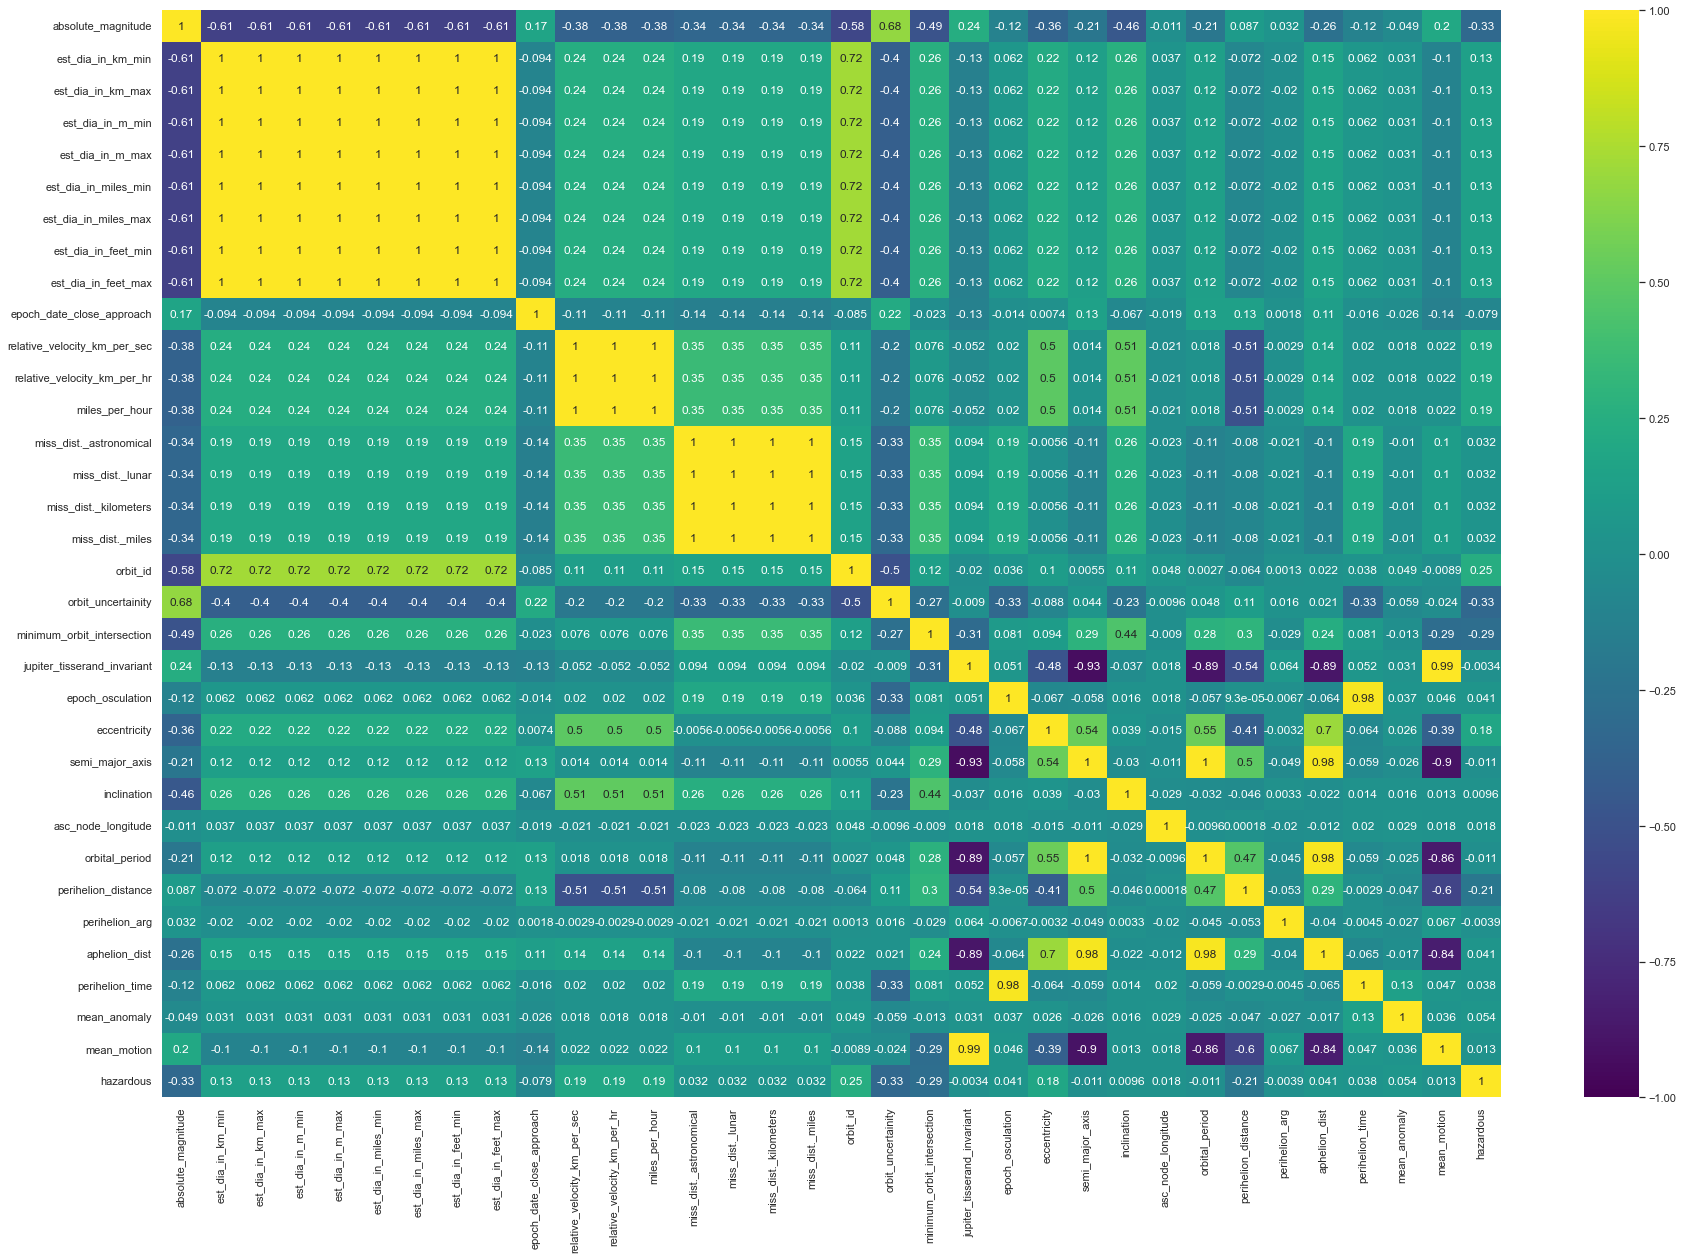

In [84]:
# check visually for feature correlation
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df_nasa.corr(), vmin=-1, vmax=1, cmap='viridis', annot=True)
plt.show()
plt.close()

In [85]:
df_nasa.drop(['est_dia_in_km_max','est_dia_in_m_min', 'est_dia_in_m_max', 'est_dia_in_m_min', 'est_dia_in_m_max',
             'est_dia_in_miles_min', 'est_dia_in_miles_max', 'est_dia_in_feet_min', 'est_dia_in_feet_max',
             'relative_velocity_km_per_sec', 'miles_per_hour', 'close_approach_date', 'epoch_date_close_approach',
             'orbit_determination_date', 'miss_dist._astronomical', 'miss_dist._lunar', 'miss_dist._miles'],
            axis=1, inplace=True)

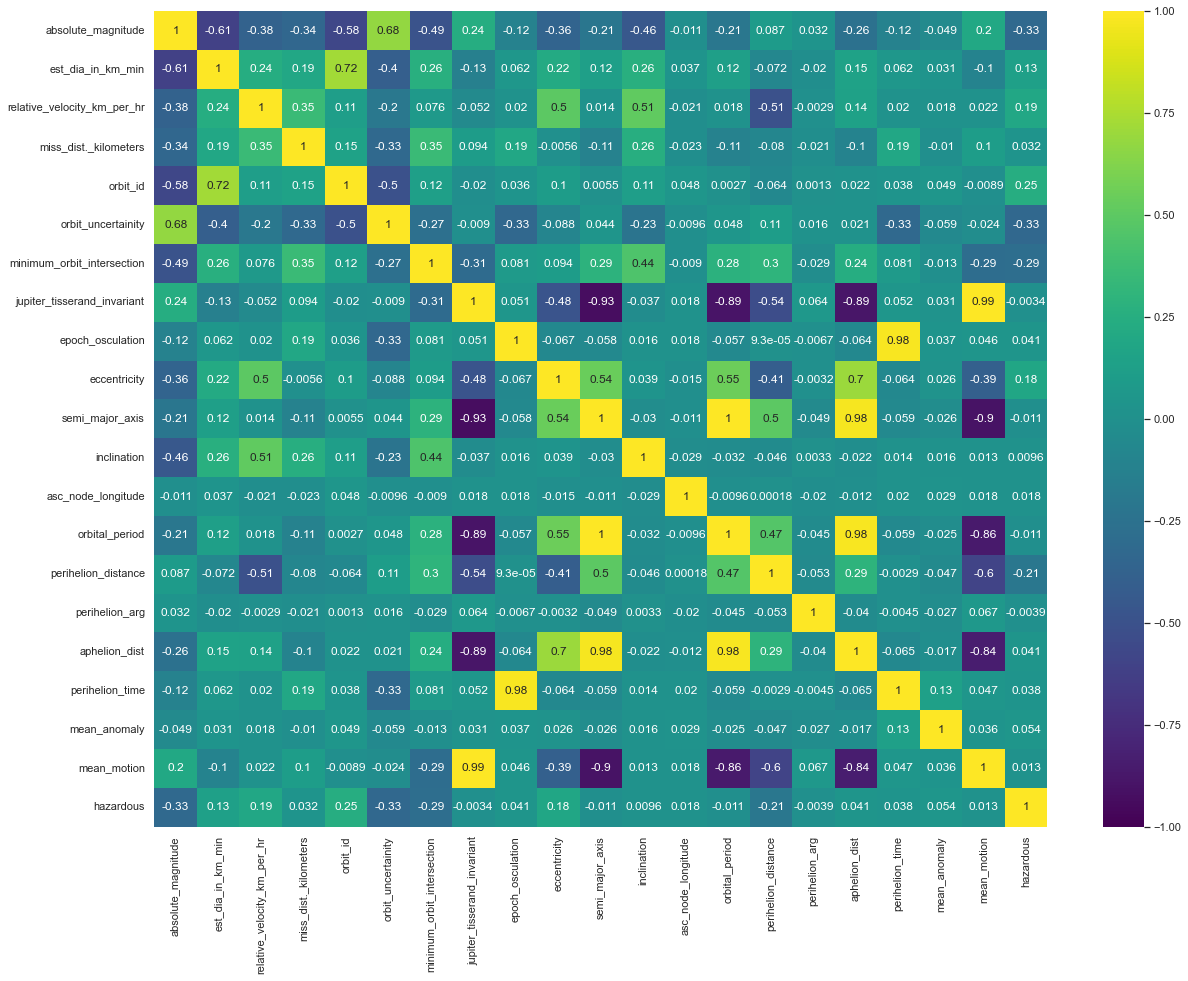

In [86]:
# plotting feature correlation with reduced dataset
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df_nasa.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True)
plt.show()
plt.close()


In [ ]:
# Min and max estimated diameter are measured in several units such as km, m, miles, and feet, 
# so only 'est_dia_in_km_min' and 'est_dia_in_km_max' will be kept
# Relative velocity is measured in km/hour, km/sec and miles/hour, so only 'relative_velocity_km_per_hr' will be kept

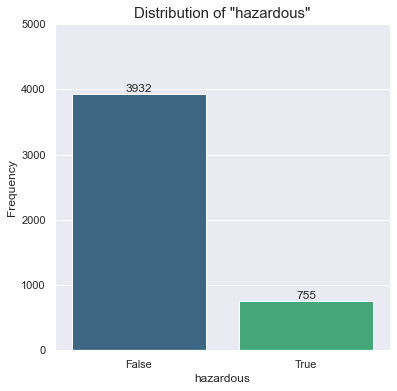

In [87]:
# barplot showing target variable distribution
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x = 'hazardous', data=df_nasa, palette="viridis")
plt.title('Distribution of "hazardous"', fontsize=15)
plt.xlabel('hazardous', size=12)
plt.ylabel('Frequency', size=12)
ax.bar_label(ax.containers[0])
plt.ylim((0, 5000))
plt.show()